In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
d = pd.read_csv('../tables/2024_03_11_merged_03.csv', parse_dates=['Time_Mid'])
d['CO_ppm'].describe()

count    13082.000000
mean         0.118462
std          0.024820
min          0.061900
25%          0.100650
50%          0.121100
75%          0.136000
max          0.255300
Name: CO_ppm, dtype: float64

In [4]:
transit_flights = [pd.Timestamp('2022-03-22').date(), pd.Timestamp('2022-05-18').date(), pd.Timestamp('2022-05-21').date(), pd.Timestamp('2022-05-31').date(), pd.Timestamp('2022-06-18').date()]
d = d[d['Time_Mid'].dt.month.isin([8, 9]) & (~d['Time_Mid'].dt.date.isin(transit_flights))]

In [5]:
d[d['CCN_n_pred'] / d['N_CCN_stdPT'] > 3]['CO_ppm'].describe()

count    66.000000
mean      0.135130
std       0.014856
min       0.080100
25%       0.128475
50%       0.137450
75%       0.145375
max       0.162800
Name: CO_ppm, dtype: float64

In [9]:
d[d['CCN_n_pred'] / d['N_CCN_stdPT'] > 2]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin01,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,...,ams_tot,D_a,k_obs,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k
2119,2119,2952,3878,3878,2020-08-21 14:02:27.500,NaN,NaN,NaN,NaN,NaN,...,12.956,291.846449,0.011252,96.145525,1004.434592,5.713,0.005174,0.004081,0.009254,0.344887
2121,2121,2957,3886,3886,2020-08-21 14:10:27.500,NaN,NaN,0.0,0.0,0.00,...,4.932,133.044448,0.024935,61.608950,424.512688,1.482,0.002464,0.001059,0.003523,0.273248
2124,2124,2960,3891,3891,2020-08-21 14:15:27.500,NaN,NaN,0.0,0.0,0.00,...,4.329,210.789010,0.022797,104.218892,257.055884,0.665,0.002617,0.000475,0.003092,0.198344
2126,2126,2962,3893,3893,2020-08-21 14:17:27.500,NaN,NaN,0.0,0.0,0.00,...,4.762,216.339278,0.013581,82.951713,332.862680,1.374,0.002420,0.000981,0.003401,0.267152
2127,2127,2964,3895,3895,2020-08-21 14:19:27.500,NaN,NaN,0.0,0.0,0.00,...,6.940,149.170853,0.029860,69.880912,578.095436,2.551,0.003135,0.001822,0.004957,0.307465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,3415,4559,4559,2020-08-28 19:49:18.500,NaN,NaN,0.0,0.0,1574.04,...,1.359,122.843315,0.129812,87.043587,158.229256,0.659,0.000500,0.000471,0.000971,0.367307
2432,2432,3417,4561,4561,2020-08-28 19:51:18.500,NaN,NaN,0.0,0.0,1303.18,...,2.249,109.423943,0.130601,72.295589,212.060838,1.485,0.000546,0.001061,0.001606,0.456750
2433,2433,3419,4563,4563,2020-08-28 19:53:18.500,NaN,NaN,0.0,0.0,0.00,...,1.132,101.399060,0.116013,62.423216,292.713812,0.851,0.000201,0.000608,0.000809,0.503401
2434,2434,3422,4567,4567,2020-08-28 19:57:18.500,NaN,NaN,0.0,0.0,0.00,...,1.439,123.103933,0.030140,49.694157,412.459045,1.056,0.000274,0.000754,0.001028,0.494260


In [7]:
d[d['CCN_n_pred'] / d['N_CCN_stdPT'] <= 3]['CO_ppm'].describe()

count    448.000000
mean       0.119612
std        0.021069
min        0.063250
25%        0.105937
50%        0.124975
75%        0.135562
max        0.170200
Name: CO_ppm, dtype: float64

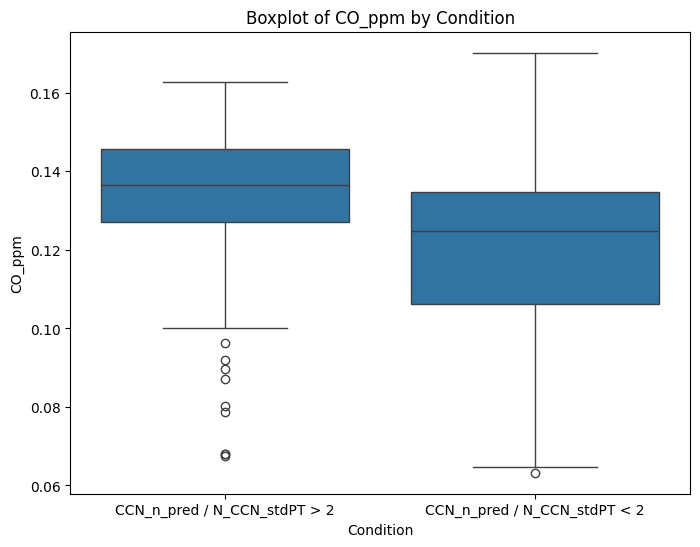

In [8]:
# Assuming 'd' is your DataFrame

# Create two subsets based on the conditions
subset1 = d[d['CCN_n_pred'] / d['N_CCN_stdPT'] > 2]['CO_ppm']
subset2 = d[d['CCN_n_pred'] / d['N_CCN_stdPT'] < 2]['CO_ppm']

# Combine the subsets into a single DataFrame for plotting
data = pd.DataFrame({
    'CO_ppm': pd.concat([subset1, subset2]),
    'Condition': ['CCN_n_pred / N_CCN_stdPT > 2'] * len(subset1) + ['CCN_n_pred / N_CCN_stdPT < 2'] * len(subset2)
})

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Condition', y='CO_ppm', data=data)
plt.title('Boxplot of CO_ppm by Condition')
plt.xlabel('Condition')
plt.ylabel('CO_ppm')
plt.show()